In [1]:
#Importe de paquetes:
import numpy as np
from numpy.linalg import eig
import pandas as pd
from pandas import read_excel
import networkx as nx
import matplotlib.pyplot as plt
import itertools as it
import scipy as sp
import scipy.sparse.linalg
import time
import seaborn as sns

1.1

In [2]:
#Creación de función que permite crear las matrices de adyacencia a partir de listados (combinatorias) de 0 y 1:
def matrix_creator(list, n):
    m=len(list)
    if 2*m==(n*(n-1)):
        counter=1
        A=[]
        AA=[0 for i in range(n)]
        while counter<n+1:
            limit=n-counter
            B=list[:limit]
            lista=list[limit:]
            C=AA[:counter]+B
            A.append(C)
            counter+=1
        A=np.array(A)
        return A+np.transpose(A)
    else:
        print("Fill with right inputs")

In [3]:
#Creación de función que genera una red de longitud (tamaño) n:
def network_creator(n):
    A=[0]*n
    B=[1]*n
    saver=set()
    counter=1
    while counter<n:
        C=B[:counter]+A[counter:]
        saver=saver.union(set(it.permutations(C,n)))
        counter+=1
    saver=[list(i) for i in saver]
    saver=[A]+saver+[B]
    return(saver)

In [4]:
#Construcción de redes de cinco (5) nodos y sus matrices adjuntas:
n=5
long=int(((n-1)*n)/2)
adjM=[matrix_creator(i,n) for i in network_creator(long)]
gs=[nx.from_numpy_array(i) for i in adjM]

In [5]:
#Creación de función que revisa las redes isomorfas:
revisor={i:True for i in range(len(gs))}
for i in revisor:
    for j in revisor:
        if j>i and revisor[i] and revisor[j] :
            if nx.is_isomorphic(gs[i], gs[j]):
                revisor[j]=False

gs_def=[gs[i] for i in revisor if revisor[i]]
adjM_def=[adjM[i] for i in revisor if revisor[i]]

1.2

In [6]:
#Creación de función de utilidad que nos permite generar las utilidades relevantes. Esta crea un diccionario con llaves=nodos i y valores=U_i(grafo).
def utility_function(grafo):
    utility_0=dict(grafo.degree())
    utility={i:(utility_0[i])**0.5 for i in utility_0}
    return utility

In [7]:
#Construcción de un objeto con las utilidades de cada nodo:
utilities=[utility_function(i) for i in gs_def]
for i in range(len(gs_def)):
    nx.set_node_attributes(gs_def[i], utilities[i], "Utility")

1.3

______________________________


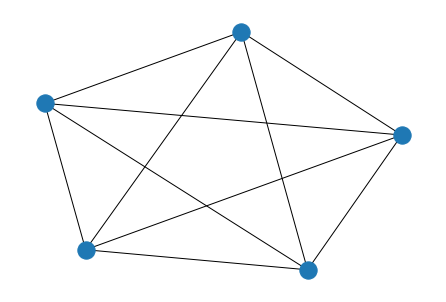

In [8]:
#Definición de la lista de utilidades totales de todos los grafos. La utilidad total de cada grafo se define como la sumatoria de las utilidades de cada nodo:
social_utility=[sum(list(nx.get_node_attributes(gs_def[i], "Utility").values())) for i in range(len(gs_def))]
#Obtención el valor máximo entre todas las utilidades:
max_social_utility=max(social_utility)
#Creación de la lista con los grafos cuya utilidad social es el máximo:
gs_SE=[gs_def[i] for i in range(len(social_utility)) if social_utility[i]==max_social_utility]

for i in gs_SE:
    print("_"*30)
    nx.draw(i)

1.4

7
______________________________


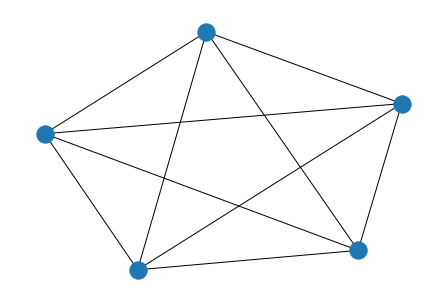

In [9]:
#Pendiente por comentar. 
utilities_i=[list(nx.get_node_attributes(gs_def[i], "Utility").values()) for i in range(len(gs_def))]
gs_PE=[]

for k in range(0,len(gs_def)):
    a=([sum(np.greater_equal(utilities_i[j], utilities_i[k])) 
    for j in range(0,len(gs_def)) if j!=k and sum(np.equal(utilities_i[j], utilities_i[k]))!=5])
    if max(a)<5:
        print(k)
        gs_PE=gs_PE+[gs_def[k]]
    
for i in gs_PE:
    print("_"*30)
    nx.draw(i)

1.5

______________________________


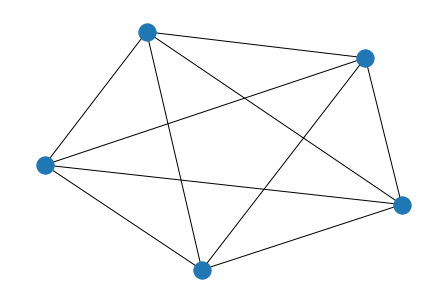

In [10]:
#Se define una lista con las utilidades de cada grafo
utilities_i=[list(nx.get_node_attributes(gs_def[i],"Utility").values()) for i in range(len(gs_def))]

#Se crea una lista que contiene los grados de cada nodo para todos los grafos contenifos en Grafos_Def
degrees=[list(dict(gs_def[j].degree).values()) for j in range(len(gs_def))]
#Lista vacias que se utilizaran en el loop
gs_E=[]


#Se realiza un loop que compara las utilidades de cada nodo para cada grafo con los nodos de los grafos restantes
#que poseen un grado mas o un grado menos. Si la utilidad de un nodo h es mayor en el grafo z que en el k, entonces
#se retorna un True en la posición del nodo de la lista compututilities. Esta lista se suma y, si las sumas de cada lista
#computilities para los grafos z distintos de k dan como resultado todas al tiempo 0, entonces
#quiere decir que ningun nodo del grafo k tiene incentivos a crear o destruir enlaces, por lo que dicho grafo se guarda
#en la lista de grafos estables Grafos_E.
for k in range(0,len(gs_def)):
   degrees_k=degrees[k]
   sumcu=[]
   for z in range(0,len(gs_def)):
      if z!=k:
         degrees_z=degrees[z]
         utilities_ik=utilities_i[k]
         utilities_iz=utilities_i[z]
         computilities=([np.greater(utilities_iz[h],utilities_ik[h])
         for h in range (0,5) if degrees_k[h]-1==degrees_z[h] or degrees_k[h]+1==degrees_z[h]])
         sumcu+=[sum(computilities)]
   if max(sumcu)==0:
      gs_E+=[gs_def[k]]
# Imprime grafo estable
for i in gs_E:
    print("_"*30)
    nx.draw(i)

1.6

In [11]:
# Se genera una lista con la suma de las utilidades para cada uno de los grafos estables calaculados en 1.5
utilities_E=[sum(list(nx.get_node_attributes(gs_E[i],"Utility").values())) for i in range(len(gs_E))]
# Luego se calcula la máxima y mínima utilidad entre los grafos estables a partir de los  valores guadados en la lista anterior 
UEmax=max(utilities_E)
UEmin=min(utilities_E)
# Finalmete se estima el precios estable (pe) y  precio de anarquía a partir de utilidad social reportada en el punto 3
PE=max_social_utility/UEmax
PA=max_social_utility/UEmin
print(PE, PA)

1.0 1.0


2

2.1

In [12]:
def Hubs(Network):
    df=pd.DataFrame()
    Hubs=[i[0] for i in Network.edges()] #Sacamos en una lista todos los nodos de Origen
    df["Hubs"]=Hubs #Volvemos esa lista una columna del DF
    Hubs=df["Hubs"].value_counts(normalize=True) #Usamos la funcion de Value_counts normalizada para ver cuantos representan de la poblacion total
    return Hubs #Devuelve una serie donde la columna 0 es el ID del nodo y la columna 1 es la cantidad de nodos del cual el es origen de manera normalizada

2.2

In [13]:
def Autor(Network):
    df=pd.DataFrame()
    Autor=[i[1] for i in Network.edges()] #Sacamos en una lista todos los nodos de Destino
    df["Autor"]=Autor #Volvemos esa lista una columna del DF
    Autor=df["Autor"].value_counts(normalize=True) #Usamos la funcion de Value_counts normalizada para ver cuantos representan de la poblacion total
    return Autor #Devuelve una serie donde la columna 0 es el ID del nodo y la columna 1 es la cantidad de nodos del cual el es destino de manera normalizada

2.3

In [14]:
def Bonanich(Network):
    M=nx.to_numpy_matrix(Network) #Extraemos la matriz de adyacencia
    auva, auve=sp.sparse.linalg.eigs(M, k=1)# Sacamos el auto vector y el auto valor
    auve_G=auve.flatten().real # Pasamos de una metriz a una lista
    norm=np.sign(auve_G.sum()) * np.linalg.norm(auve_G)
    vectores=(auve_G/norm).astype(float) #Los lamdas que resuelven la ecuacion
    centrality=dict(zip(g_twi, vectores)) # Mapea entre los nodos y los vectores anteriormente descritos
    return centrality

2.4

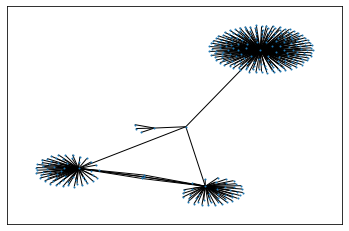

In [15]:
#Cargue de la base de datos ->configure aquí su directorio<-:
os.chdir("C:/Users/ASUS/Documents/Universidad de los Andes/2022-2/Modelos de Interacciones Sociales/Taller 1")
twi=pd.read_csv("2020_20_MIS_T1_Twitter.csv")
twi.pop("Unnamed: 0")
g_twi=nx.Graph()
g_twi=nx.from_pandas_edgelist(twi, source="From", target="To")
M_twi=nx.to_numpy_matrix(g_twi)
nx.draw_networkx(g_twi,with_labels=False, node_size=1)
plt.show()

2.5

In [16]:
Hubs=Hubs(g_twi)
display(Hubs)

41         0.600000
20         0.196667
3          0.166667
1          0.013333
8762941    0.010000
8762946    0.003333
8762949    0.003333
38253      0.003333
8657299    0.003333
Name: Hubs, dtype: float64

In [17]:
Authorities=Autor(g_twi)
display(Authorities)

20         0.016667
187567     0.003333
302        0.003333
194869     0.003333
307        0.003333
             ...   
8762994    0.003333
8762993    0.003333
8762992    0.003333
8762991    0.003333
45567      0.003333
Name: Autor, Length: 296, dtype: float64

In [18]:
Bonanich=Bonanich(g_twi)
display(Authorities)

20         0.016667
187567     0.003333
302        0.003333
194869     0.003333
307        0.003333
             ...   
8762994    0.003333
8762993    0.003333
8762992    0.003333
8762991    0.003333
45567      0.003333
Name: Autor, Length: 296, dtype: float64

3

3.1

In [19]:
A=pd.read_excel(r"Matriz insumo-producto 2017.xlsx", "MIP", engine="openpyxl")

#Creación de la matriz de coeficientes técnicos:
A.rename(columns={"Unnamed: 0":"Sectores"}, inplace=True)
A.set_index("Sectores", inplace=True)
num=A.iloc[:, 0:24]
B=A.iloc[:, 0:25]
d=A.iloc[:, 24:25]
den=B.sum(axis=1)
den=pd.DataFrame(den)
den=den[den.columns.repeat(24)]
den=den.T
cols=list(den.columns.values)
den["Sectores"]=cols
den.set_index("Sectores", inplace=True)
A=num/den
A=pd.DataFrame(A)

#Guardado del dataframe A a formato .csv:
A.to_csv("A.csv", decimal=",", index=False) 

3.2 

In [20]:
#Creación de la matriz inversa de Leontief:
L=np.linalg.inv(np.identity(24)-A)

3.3


In [21]:
#Guardado del dataframe d a formato .csv:
d=pd.DataFrame(d)
d.to_csv("d.csv", decimal=",", index=False) 

3.4

,x
count,24.000000
mean,60964.541667
std,39940.164260
min,201.769366
25%,30975.829955
50%,59078.096387
75%,86805.930732
max,154659.662547


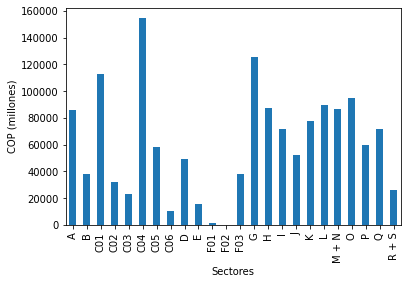

In [22]:
#Vector de equilibrio:
x=np.matmul(L, d)
x["Sectores"]=cols
x.set_index("Sectores", inplace=True)
x.rename(columns={"Gasto de Consumo Final":"x"}, inplace=True)

#Gráfica:
x.plot.bar(y="x", legend=None)
plt.xlabel("Sectores")
plt.ylabel("COP (millones)")
plt.savefig("x.jpg")
plt.savefig("x.jpg", bbox_inches = "tight")

#Estadísticas descriptivas:
x.describe()

3.5

,delta_x
count,24.000000
mean,-6096.454167
std,3994.016426
min,-15465.966255
25%,-8680.593073
50%,-5907.809639
75%,-3097.582995
max,-20.176937


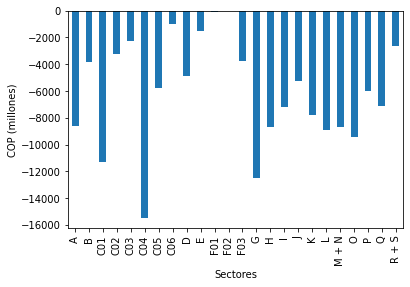

In [23]:
#Cambio en el vector de equilibrio: 
delta_d=-0.1*d
delta_x=np.matmul(L, delta_d)
delta_x["Sectores"]=cols
delta_x.set_index("Sectores", inplace=True)
delta_x.rename(columns={"Gasto de Consumo Final":"delta_x"}, inplace=True)

#Gráfica:
delta_x.plot.bar(y="delta_x", legend=None)
plt.xlabel("Sectores")
plt.ylabel("COP (millones)")
plt.savefig("delta_x.jpg", bbox_inches = "tight")

#Estadísticas descriptivas: 
delta_x.describe()